In [38]:
%matplotlib notebook

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt


In [40]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

In [41]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)

In [42]:
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month

In [43]:
housing_df2 = housing_df2[housing_df2.PRICE.notnull()]
residential_df = housing_df2.loc[housing_df2["SOURCE"] == "Residential"]
residential_df.count().head()

BATHRM       57900
HF_BATHRM    57900
HEAT         57900
AC           57900
NUM_UNITS    57900
dtype: int64

In [44]:
housing_df3 = residential_df[['BATHRM','WARD','BEDRM','HF_BATHRM','YEAR','PRICE']]
housing_df3 = housing_df3[~(housing_df3['YEAR'] < 2007.0)] 
housing_df3 = housing_df3[~(housing_df3['YEAR'] > 2017.0)]

In [45]:
two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
two_bed_one_bath_df = two_bed_one_bath[two_bed_one_bath['BEDRM'] == 2]
two_bed_one_bath_df2 = two_bed_one_bath_df[two_bed_one_bath_df['BATHRM'] == 1]
two_bed_one_bath_df3 = two_bed_one_bath_df2[two_bed_one_bath_df2['HF_BATHRM'] == 0]
two_bed_one_bath_avg = pd.DataFrame(two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
two_bed_one_bath_avg = two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
two_bed_two_bath_df = two_bed_two_bath[two_bed_two_bath['BEDRM'] == 2]
two_bed_two_bath_df2 = two_bed_two_bath_df[two_bed_two_bath_df['BATHRM'] == 2]
two_bed_two_bath_df3 = two_bed_two_bath_df2[two_bed_two_bath_df2['HF_BATHRM'] == 0]
two_bed_two_bath_avg = pd.DataFrame(two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
two_bed_two_bath_avg = two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
three_bed_two_bath_df = three_bed_two_bath[three_bed_two_bath['BEDRM'] == 3]
three_bed_two_bath_df2 = three_bed_two_bath_df[three_bed_two_bath_df['BATHRM'] == 2]
three_bed_two_bath_df3 = three_bed_two_bath_df2[three_bed_two_bath_df2['HF_BATHRM'] == 0]
three_bed_two_bath_avg = pd.DataFrame(three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
three_bed_two_bath_avg = three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

four_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
four_bed_two_bath_df = four_bed_two_bath[four_bed_two_bath['BEDRM'] == 4]
four_bed_two_bath_df2 = four_bed_two_bath_df[four_bed_two_bath_df['BATHRM'] == 2]
four_bed_two_bath_df3 = four_bed_two_bath_df2[four_bed_two_bath_df2['HF_BATHRM'] == 0]
four_bed_two_bath_avg = pd.DataFrame(four_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
four_bed_two_bath_avg = four_bed_two_bath_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})

four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
four_bed_three_bath_df = four_bed_three_bath[four_bed_three_bath['BEDRM'] == 4]
four_bed_three_bath_df2 = four_bed_three_bath_df[four_bed_three_bath_df['BATHRM'] == 3]
four_bed_three_bath_df3 = four_bed_three_bath_df2[four_bed_three_bath_df2['HF_BATHRM'] == 0]
four_bed_three_bath_avg = pd.DataFrame(four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
four_bed_three_bath_avg = four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})


bed_bath_ward1_merge1 = two_bed_one_bath_avg.join(two_bed_two_bath_avg,how='left')
bed_bath_ward1_merge2 = bed_bath_ward1_merge1.join(three_bed_two_bath_avg,how='left')
bed_bath_ward1_merge3 = bed_bath_ward1_merge2.join(four_bed_two_bath_avg,how='left')
bed_bath_ward1_merge4 = bed_bath_ward1_merge3.join(four_bed_three_bath_avg,how='left')


bed_bath_ward1_merge4.style.format("${:,.2f}")



<IPython.core.display.Javascript object>


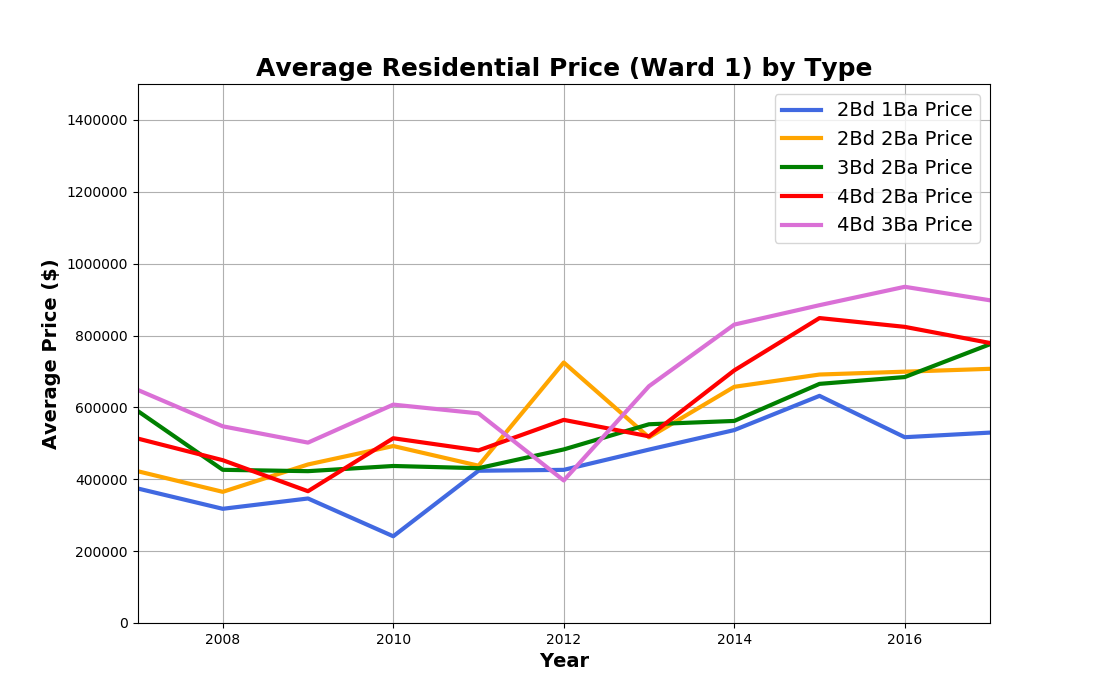

In [46]:
colors = ["royalblue", "orange", "green", "red", "orchid", "rosybrown", "pink"]
bed_bath_ward1_merge4.plot(xlim=(1998.0,2017.0), figsize=(11,7), color = colors, linewidth=3)
plt.title("Average Residential Price (Ward 1) by Type", fontsize=18, fontweight='bold')
plt.ylabel("Average Price ($)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.grid()
plt.ylim(-25,1500000)
plt.xlim(2007,2017)
plt.legend(fontsize=14)
plt.savefig("NewImages/home_types_in_DC_ward1.png")

In [13]:
ward_2_two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_two_bed_one_bath_df = ward_2_two_bed_one_bath[ward_2_two_bed_one_bath['BEDRM'] == 2]
ward_2_two_bed_one_bath_df2 = ward_2_two_bed_one_bath_df[ward_2_two_bed_one_bath_df['BATHRM'] == 1]
ward_2_two_bed_one_bath_df3 = ward_2_two_bed_one_bath_df2[ward_2_two_bed_one_bath_df2['HF_BATHRM'] == 0]
ward_2_two_bed_one_bath_avg = pd.DataFrame(ward_2_two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_two_bed_one_bath_avg = ward_2_two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

ward_2_two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_two_bed_two_bath_df = ward_2_two_bed_two_bath[ward_2_two_bed_two_bath['BEDRM'] == 2]
ward_2_two_bed_two_bath_df2 = ward_2_two_bed_two_bath_df[ward_2_two_bed_two_bath_df['BATHRM'] == 2]
ward_2_two_bed_two_bath_df3 = ward_2_two_bed_two_bath_df2[ward_2_two_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_2_two_bed_two_bath_avg = pd.DataFrame(ward_2_two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_two_bed_two_bath_avg = ward_2_two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

ward_2_three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_three_bed_two_bath_df = ward_2_three_bed_two_bath[ward_2_three_bed_two_bath['BEDRM'] == 3]
ward_2_three_bed_two_bath_df2 = ward_2_three_bed_two_bath_df[ward_2_three_bed_two_bath_df['BATHRM'] == 2]
ward_2_three_bed_two_bath_df3 = ward_2_three_bed_two_bath_df2[ward_2_three_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_2_three_bed_two_bath_avg = pd.DataFrame(ward_2_three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_three_bed_two_bath_avg = ward_2_three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

ward_2_four_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_four_bed_two_bath_df = ward_2_four_bed_two_bath[ward_2_four_bed_two_bath['BEDRM'] == 4]
ward_2_four_bed_two_bath_df2 = ward_2_four_bed_two_bath_df[ward_2_four_bed_two_bath_df['BATHRM'] == 2]
ward_2_four_bed_two_bath_df3 = ward_2_four_bed_two_bath_df2[ward_2_four_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_2_four_bed_two_bath_avg = pd.DataFrame(ward_2_four_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_four_bed_two_bath_avg = ward_2_four_bed_two_bath_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})

ward_2_four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_four_bed_three_bath_df = ward_2_four_bed_three_bath[ward_2_four_bed_three_bath['BEDRM'] == 4]
ward_2_four_bed_three_bath_df2 = ward_2_four_bed_three_bath_df[ward_2_four_bed_three_bath_df['BATHRM'] == 3]
ward_2_four_bed_three_bath_df3 = ward_2_four_bed_three_bath_df2[ward_2_four_bed_three_bath_df2['HF_BATHRM'] == 0]
ward_2_four_bed_three_bath_avg = pd.DataFrame(ward_2_four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_four_bed_three_bath_avg = ward_2_four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})


bed_bath_ward2_merge1 = ward_2_two_bed_one_bath_avg.join(ward_2_two_bed_two_bath_avg,how='left')
bed_bath_ward2_merge2 = bed_bath_ward2_merge1.join(ward_2_three_bed_two_bath_avg,how='left')
bed_bath_ward2_merge3 = bed_bath_ward2_merge2.join(ward_2_four_bed_two_bath_avg,how='left')
bed_bath_ward2_merge4 = bed_bath_ward2_merge3.join(ward_2_four_bed_three_bath_avg,how='left')

bed_bath_ward2_merge4.style.format("${:,.2f}")

<IPython.core.display.Javascript object>


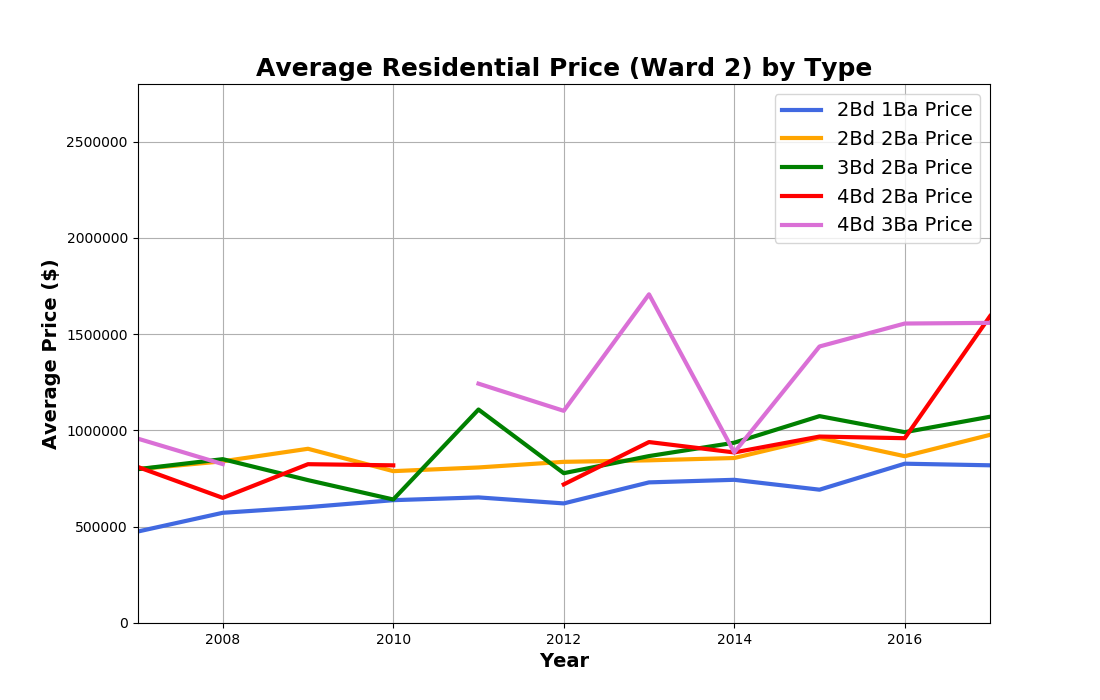

In [14]:
colors = ["royalblue", "orange", "green", "red", "orchid", "rosybrown", "pink"]
bed_bath_ward2_merge4.plot(xlim=(1998.0,2017.0), figsize=(11,7), color = colors, linewidth=3)
plt.title("Average Residential Price (Ward 2) by Type", fontsize=18, fontweight='bold')
plt.ylabel("Average Price ($)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.grid()
plt.ylim(-25,2800000)
plt.xlim(2007,2017)
plt.legend(fontsize=14)
plt.savefig("NewImages/home_types_in_DC_ward2.png")

In [19]:
ward_3_two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_two_bed_one_bath_df = ward_3_two_bed_one_bath[ward_3_two_bed_one_bath['BEDRM'] == 2]
ward_3_two_bed_one_bath_df2 = ward_3_two_bed_one_bath_df[ward_3_two_bed_one_bath_df['BATHRM'] == 1]
ward_3_two_bed_one_bath_df3 = ward_3_two_bed_one_bath_df2[ward_3_two_bed_one_bath_df2['HF_BATHRM'] == 0]
ward_3_two_bed_one_bath_avg = pd.DataFrame(ward_3_two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_two_bed_one_bath_avg = ward_3_two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

ward_3_two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_two_bed_two_bath_df = ward_3_two_bed_two_bath[ward_3_two_bed_two_bath['BEDRM'] == 2]
ward_3_two_bed_two_bath_df2 = ward_3_two_bed_two_bath_df[ward_3_two_bed_two_bath_df['BATHRM'] == 2]
ward_3_two_bed_two_bath_df3 = ward_3_two_bed_two_bath_df2[ward_3_two_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_3_two_bed_two_bath_avg = pd.DataFrame(ward_3_two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_two_bed_two_bath_avg = ward_3_two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

ward_3_three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_three_bed_two_bath_df = ward_3_three_bed_two_bath[ward_3_three_bed_two_bath['BEDRM'] == 3]
ward_3_three_bed_two_bath_df2 = ward_3_three_bed_two_bath_df[ward_3_three_bed_two_bath_df['BATHRM'] == 2]
ward_3_three_bed_two_bath_df3 = ward_3_three_bed_two_bath_df2[ward_3_three_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_3_three_bed_two_bath_avg = pd.DataFrame(ward_3_three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_three_bed_two_bath_avg = ward_3_three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

ward_3_four_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_four_bed_two_bath_df = ward_3_four_bed_two_bath[ward_3_four_bed_two_bath['BEDRM'] == 4]
ward_3_four_bed_two_bath_df2 = ward_3_four_bed_two_bath_df[ward_3_four_bed_two_bath_df['BATHRM'] == 2]
ward_3_four_bed_two_bath_df3 = ward_3_four_bed_two_bath_df2[ward_3_four_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_3_four_bed_two_bath_avg = pd.DataFrame(ward_3_four_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_four_bed_two_bath_avg = ward_3_four_bed_two_bath_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})

ward_3_four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_four_bed_three_bath_df = ward_3_four_bed_three_bath[ward_3_four_bed_three_bath['BEDRM'] == 4]
ward_3_four_bed_three_bath_df2 = ward_3_four_bed_three_bath_df[ward_3_four_bed_three_bath_df['BATHRM'] == 3]
ward_3_four_bed_three_bath_df3 = ward_3_four_bed_three_bath_df2[ward_3_four_bed_three_bath_df2['HF_BATHRM'] == 0]
ward_3_four_bed_three_bath_avg = pd.DataFrame(ward_3_four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_four_bed_three_bath_avg = ward_3_four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})


bed_bath_ward3_merge1 = ward_3_two_bed_one_bath_avg.join(ward_3_two_bed_two_bath_avg,how='left')
bed_bath_ward3_merge2 = bed_bath_ward3_merge1.join(ward_3_three_bed_two_bath_avg,how='left')
bed_bath_ward3_merge3 = bed_bath_ward3_merge2.join(ward_3_four_bed_two_bath_avg,how='left')
bed_bath_ward3_merge4 = bed_bath_ward3_merge3.join(ward_3_four_bed_three_bath_avg,how='left')

bed_bath_ward3_merge4.style.format("${:,.2f}")

<IPython.core.display.Javascript object>


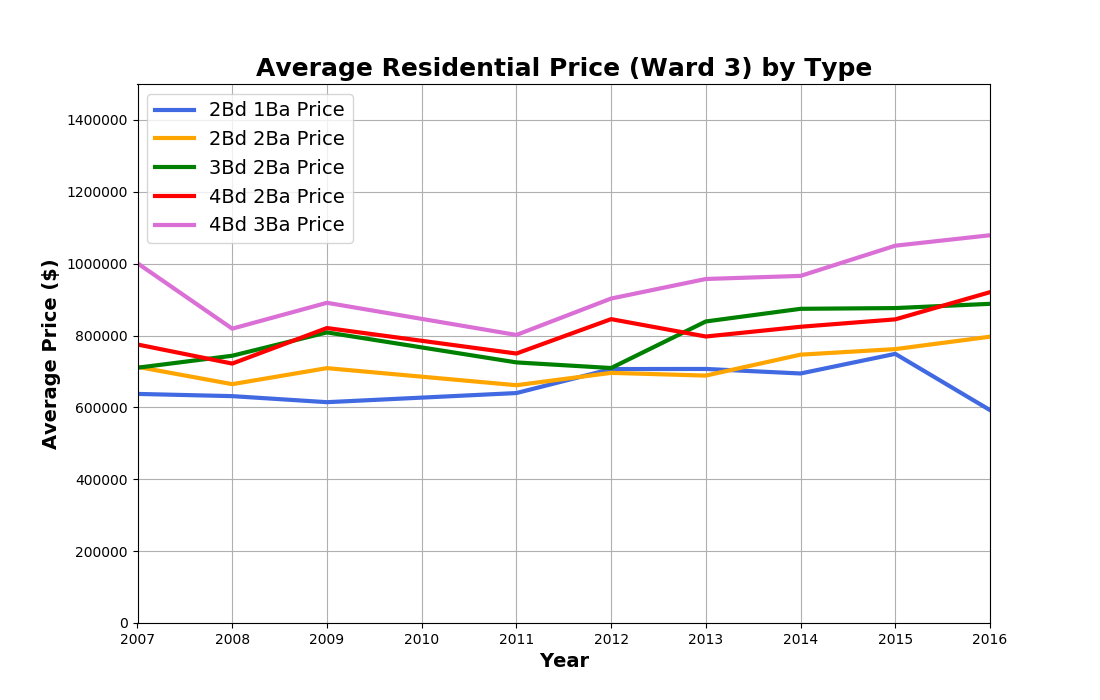

In [20]:
colors = ["royalblue", "orange", "green", "red", "orchid", "rosybrown", "pink"]
bed_bath_ward3_merge4.plot(xlim=(1998.0,2017.0), figsize=(11,7), color = colors, linewidth=3)
plt.title("Average Residential Price (Ward 3) by Type", fontsize=18, fontweight='bold')
plt.ylabel("Average Price ($)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.grid()
plt.ylim(-25,1500000)
plt.xlim(2007,2016)
plt.legend(fontsize=14)
plt.savefig("NewImages/home_types_in_DC_ward3.png")

In [21]:
ward_4_two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_two_bed_one_bath_df = ward_4_two_bed_one_bath[ward_4_two_bed_one_bath['BEDRM'] == 2]
ward_4_two_bed_one_bath_df2 = ward_4_two_bed_one_bath_df[ward_4_two_bed_one_bath_df['BATHRM'] == 1]
ward_4_two_bed_one_bath_df3 = ward_4_two_bed_one_bath_df2[ward_4_two_bed_one_bath_df2['HF_BATHRM'] == 0]
ward_4_two_bed_one_bath_avg = pd.DataFrame(ward_4_two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_two_bed_one_bath_avg = ward_4_two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

ward_4_two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_two_bed_two_bath_df = ward_4_two_bed_two_bath[ward_4_two_bed_two_bath['BEDRM'] == 2]
ward_4_two_bed_two_bath_df2 = ward_4_two_bed_two_bath_df[ward_4_two_bed_two_bath_df['BATHRM'] == 2]
ward_4_two_bed_two_bath_df3 = ward_4_two_bed_two_bath_df2[ward_4_two_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_4_two_bed_two_bath_avg = pd.DataFrame(ward_4_two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_two_bed_two_bath_avg = ward_4_two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

ward_4_three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_three_bed_two_bath_df = ward_4_three_bed_two_bath[ward_4_three_bed_two_bath['BEDRM'] == 3]
ward_4_three_bed_two_bath_df2 = ward_4_three_bed_two_bath_df[ward_4_three_bed_two_bath_df['BATHRM'] == 2]
ward_4_three_bed_two_bath_df3 = ward_4_three_bed_two_bath_df2[ward_4_three_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_4_three_bed_two_bath_avg = pd.DataFrame(ward_4_three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_three_bed_two_bath_avg = ward_4_three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

ward_4_four_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_four_bed_two_bath_df = ward_4_four_bed_two_bath[ward_4_four_bed_two_bath['BEDRM'] == 4]
ward_4_four_bed_two_bath_df2 = ward_4_four_bed_two_bath_df[ward_4_four_bed_two_bath_df['BATHRM'] == 2]
ward_4_four_bed_two_bath_df3 = ward_4_four_bed_two_bath_df2[ward_4_four_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_4_four_bed_two_bath_avg = pd.DataFrame(ward_4_four_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_four_bed_two_bath_avg = ward_4_four_bed_two_bath_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})

ward_4_four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_four_bed_three_bath_df = ward_4_four_bed_three_bath[ward_4_four_bed_three_bath['BEDRM'] == 4]
ward_4_four_bed_three_bath_df2 = ward_4_four_bed_three_bath_df[ward_4_four_bed_three_bath_df['BATHRM'] == 3]
ward_4_four_bed_three_bath_df3 = ward_4_four_bed_three_bath_df2[ward_4_four_bed_three_bath_df2['HF_BATHRM'] == 0]
ward_4_four_bed_three_bath_avg = pd.DataFrame(ward_4_four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_four_bed_three_bath_avg = ward_4_four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})

bed_bath_ward4_merge1 = ward_4_two_bed_one_bath_avg.join(ward_4_two_bed_two_bath_avg,how='left')
bed_bath_ward4_merge2 = bed_bath_ward4_merge1.join(ward_4_three_bed_two_bath_avg,how='left')
bed_bath_ward4_merge3 = bed_bath_ward4_merge2.join(ward_4_four_bed_two_bath_avg,how='left')
bed_bath_ward4_merge4 = bed_bath_ward4_merge3.join(ward_4_four_bed_three_bath_avg,how='left')


bed_bath_ward4_merge4.style.format("${:,.2f}")

<IPython.core.display.Javascript object>


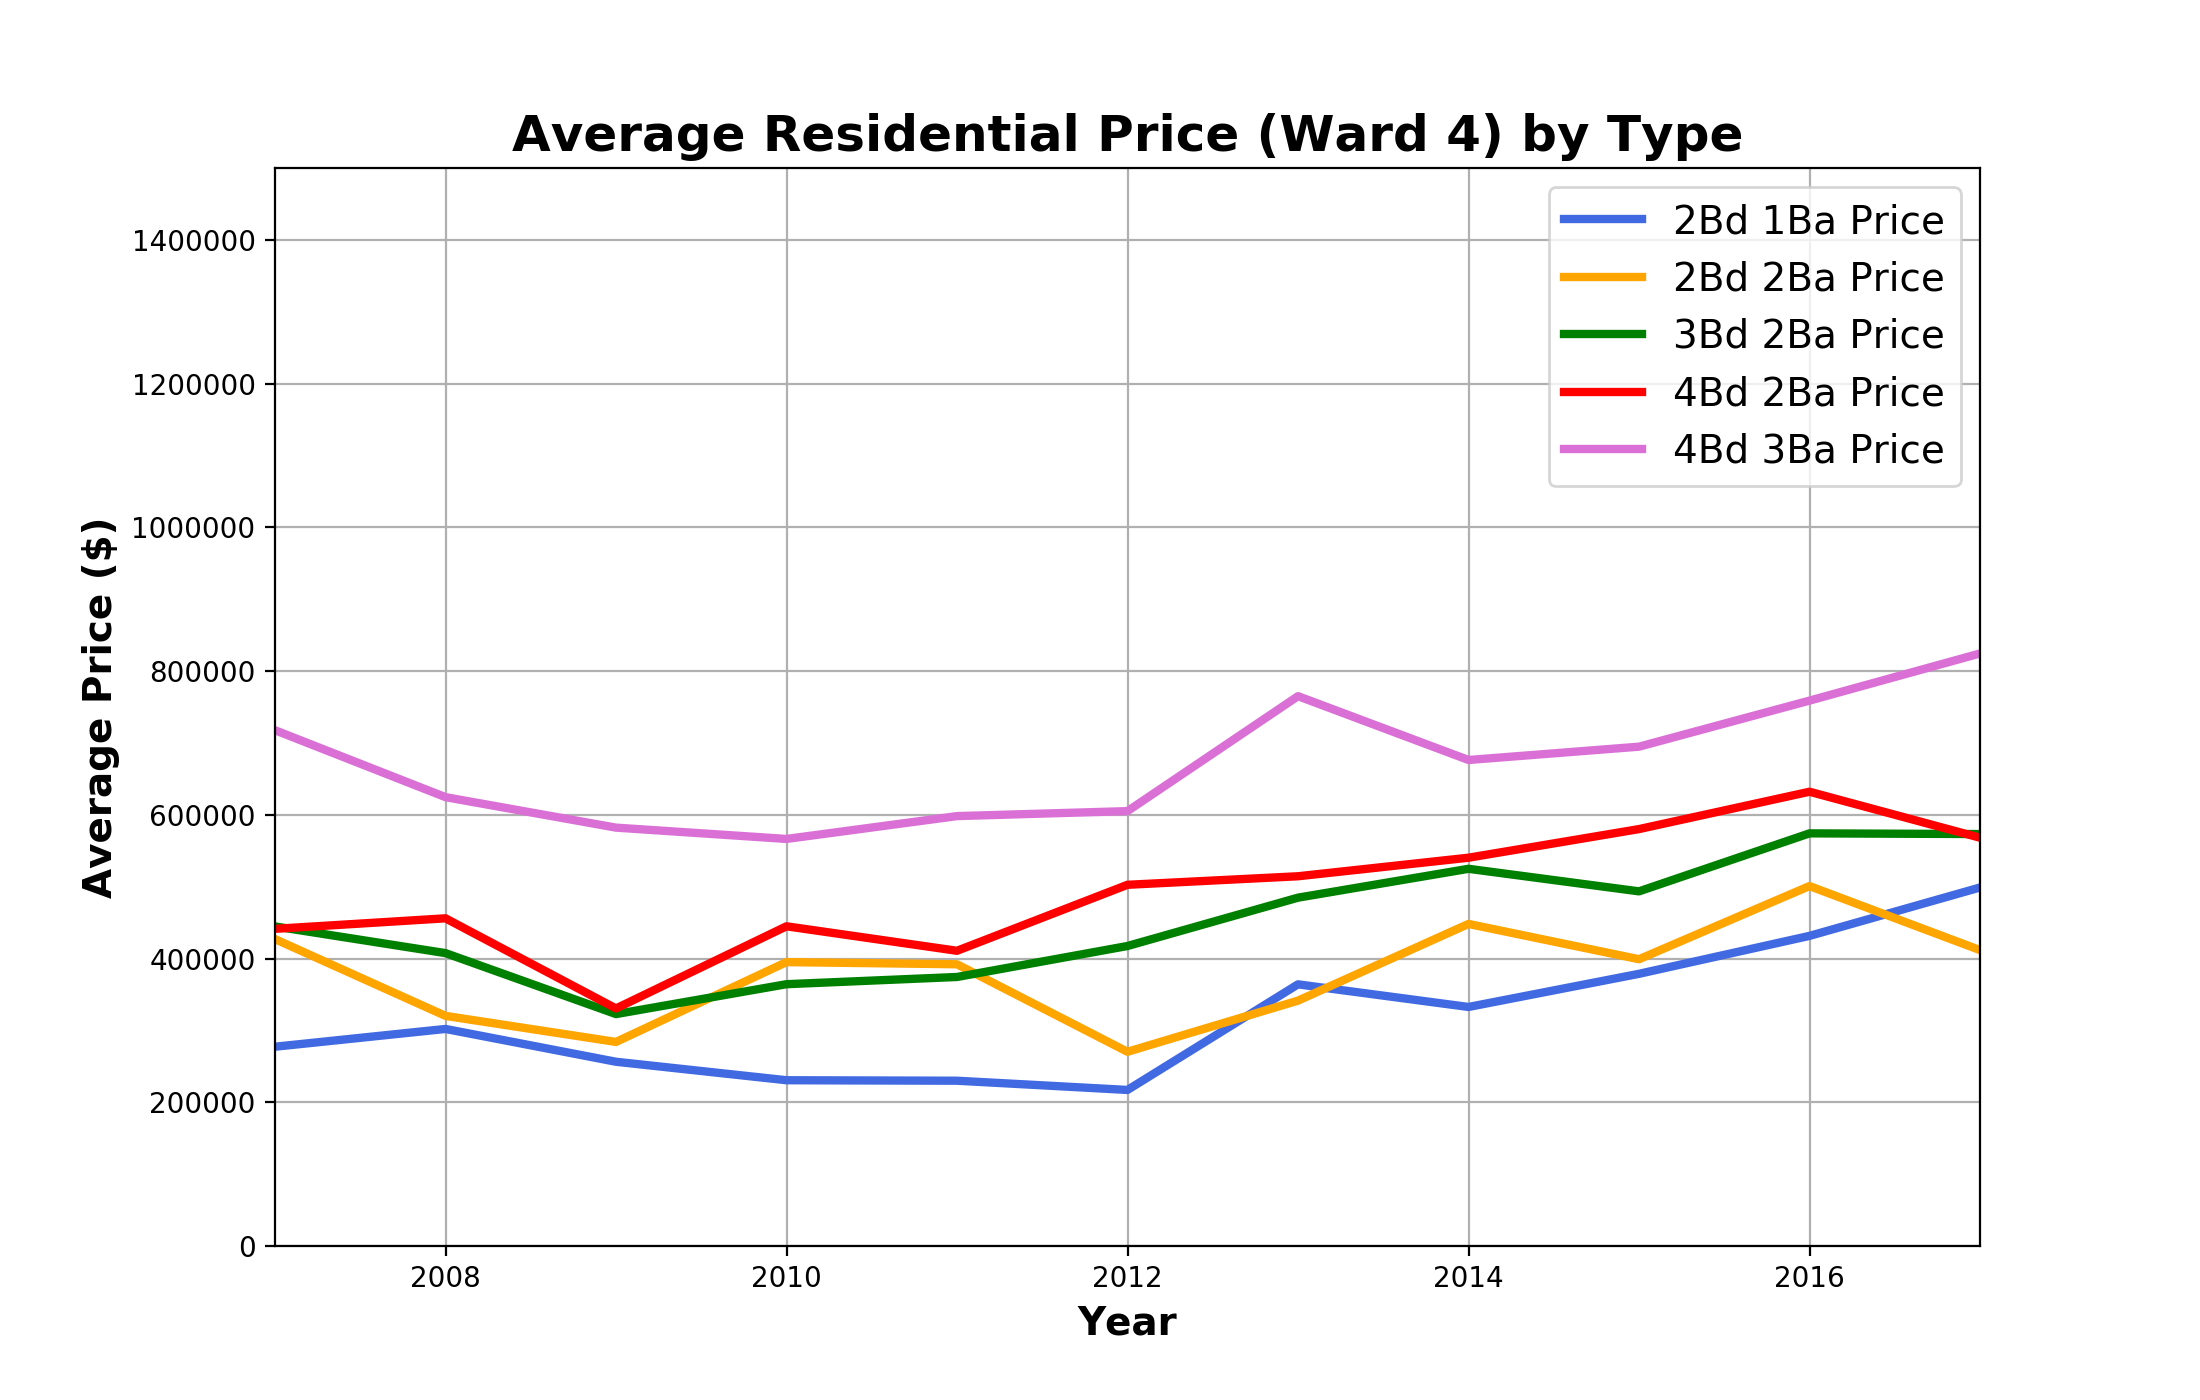

In [70]:
colors = ["royalblue", "orange", "green", "red", "orchid", "rosybrown", "pink"]
bed_bath_ward4_merge4.plot(xlim=(1998.0,2017.0), figsize=(11,7), color = colors, linewidth=3)
plt.title("Average Residential Price (Ward 4) by Type", fontsize=18, fontweight='bold')
plt.ylabel("Average Price ($)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.grid()
plt.ylim(-25,1500000)
plt.xlim(2007,2017)
plt.legend(fontsize=14)
plt.savefig("NewImages/home_types_in_DC_ward4.png")